# COVID 19 Analysis


I stole some of this from Brice R -- who did a nice job confirming exponential growth of virus confirmed cases.  See (https://ro-z.net/assets/covid19quickanalysis.html)

I am throwing in analysis of my local target US states + the hot countries Spain, Italy, etc to compare and contrast.

Datasets are all available on github courtesy of John Hopkins, just download via:

-  git clone https://github.com/CSSEGISandData/COVID-19.git


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drdir = 'COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
tsdir = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/'

daily_f = drdir+'01-22-2020.csv' # 03-18-2020.csv etc
confirmed_f = tsdir+'time_series_19-covid-Confirmed.csv'
deaths_f = tsdir+'time_series_19-covid-Deaths.csv'

dfc = pd.read_csv(confirmed_f)
confirmed = dfc.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
confirmed.index = pd.to_datetime(confirmed.index)

dfd = pd.read_csv(deaths_f)
deaths = dfd.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
deaths.index = pd.to_datetime(deaths.index)


In [4]:
dfc.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790


In [5]:
confirmed = dfc.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
confirmed.index = pd.to_datetime(confirmed.index)

dfd = pd.read_csv(deaths_f)
deaths = dfd.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
deaths.index = pd.to_datetime(deaths.index)


In [16]:
[x for x in confirmed.columns if 'K' in x]


['Congo (Kinshasa)',
 'Kazakhstan',
 'Kenya',
 'Korea, South',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 'United Kingdom']

In [18]:
countries = [ 'Japan', 'US', 'Italy', 'Spain','France', 'Korea, South' ]
deaths[ countries ].tail()


Country/Region,Japan,US,Italy,Spain,France,"Korea, South"
2020-03-14,22,54,1441,195,91,72
2020-03-15,22,63,1809,289,91,75
2020-03-16,27,85,2158,342,148,75
2020-03-17,29,108,2503,533,148,81
2020-03-18,29,118,2978,623,148,84


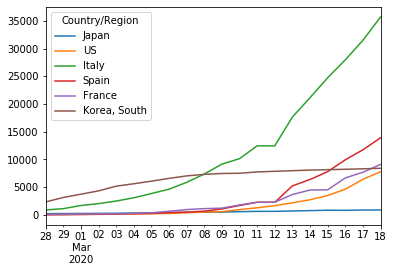

In [19]:
confirmed[ countries ].tail(20).plot()


In [20]:
confirmed_us = dfc[ dfc['Country/Region'] == 'US']
confirmed_us.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,0,267,366,442,568,572,643,904,1076,1014
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,173,220,328,421,525,732,967,1706,2495
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,144,177,221,282,340,426,557,698,751
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,0,92,95,108,123,138,164,197,218,218
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,45,46,46,46,46,46,46,47,47,47


In [22]:
confirmed_us = dfc[ dfc['Country/Region'] == 'US']
states = [x for x in list(confirmed_us['Province/State']) if 'NC' in x or 'North Carolina' in x]
states


['North Carolina', 'Camden, NC', 'Chatham County, NC', 'Wake County, NC']

In [24]:
# merge to NC
nc1 = confirmed_us[confirmed_us['Province/State'].isin( states )].drop(columns=['Lat', 'Long'])
nc1[ 'Province/State' ] = 'North Carolina'
nc = nc1.groupby( 'Province/State' ).sum().transpose()
nc.tail()

Province/State,North Carolina
3/14/20,24
3/15/20,33
3/16/20,38
3/17/20,64
3/18/20,70


In [28]:
def FindState(df, statefull, stateshort):
    states = [x for x in list(df['Province/State']) if stateshort in x or statefull == x]
    return states
    

def ExtractState(df, statefull, stateshort):
    states = FindState(df,statefull,stateshort)
    pre = df[ df[ 'Province/State'].isin(states)].drop(columns=['Lat','Long'])
    pre['Province/State'] = statefull
    return pre.groupby('Province/State').sum().transpose()

In [31]:
FindState(confirmed_us, 'Texas', 'TX')


['Texas',
 'Gregg, TX',
 'Collin County, TX',
 'Fort Bend County, TX',
 'Harris County, TX',
 'Dallas, TX',
 'Tarrant, TX',
 'Montgomery, TX']

In [33]:
confirmed_st = ExtractState(confirmed_us, 'Texas', 'TX')
confirmed_st['New York'] = ExtractState(confirmed_us, 'New York', 'NY')
confirmed_st['California'] = ExtractState(confirmed_us, 'California', 'CA')
confirmed_st['North Carolina'] = ExtractState(confirmed_us, 'North Carolina', 'NC')

confirmed_st['Japan'] = confirmed['Japan']
confirmed_st['Spain'] = confirmed['Spain']
confirmed_st['Italy'] = confirmed['Italy']
confirmed_st['France'] = confirmed['France']
confirmed_st['Korea, South'] = confirmed['Korea, South']
confirmed_st['US'] = confirmed['US']

confirmed_st.tail()

Province/State,Texas,New York,California,North Carolina,Japan,Spain,Italy,France,"Korea, South",US
3/14/20,57,525,340,24,773,6391,21157,4487,8086,2727
3/15/20,72,732,426,33,839,7798,24747,4523,8162,3499
3/16/20,85,967,557,38,825,9942,27980,6668,8236,4632
3/17/20,110,1706,698,64,878,11748,31506,7699,8320,6421
3/18/20,173,2495,751,70,889,13910,35713,9105,8413,7783


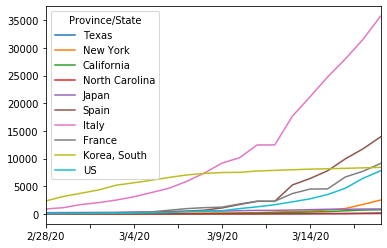

In [34]:
confirmed_st.tail(20).plot()


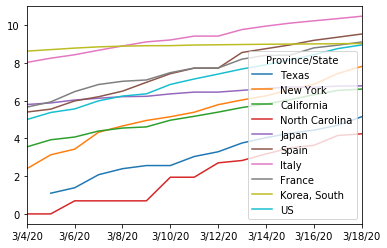

In [35]:
confirmed_st.apply(np.log).tail(15).plot()


In [36]:
confirmed_st.apply(np.log).tail(10)


Province/State,Texas,New York,California,North Carolina,Japan,Spain,Italy,France,"Korea, South",US
3/9/20,2.564949,4.955827,4.615121,0.693147,6.236370,6.978214,9.123911,7.104144,8.919721,6.368187
3/10/20,2.564949,5.153292,4.969813,1.945910,6.364751,7.435438,9.225130,7.491088,8.924390,6.865891
3/11/20,3.044522,5.393628,5.176150,1.945910,6.459904,7.730614,9.430439,7.736307,8.956093,7.155396
3/12/20,3.295837,5.793014,5.398163,2.708050,6.459904,7.730614,9.430439,7.736307,8.970686,7.416378
3/13/20,3.761200,6.042633,5.641907,2.833213,6.552508,8.562549,9.779057,8.210124,8.984568,7.686621
3/14/20,4.043051,6.263398,5.828946,3.178054,6.650279,8.762646,9.959726,8.408940,8.997889,7.910957
3/15/20,4.276666,6.595781,6.054439,3.496508,6.732211,8.961623,10.116460,8.416931,9.007245,8.160232
3/16/20,4.442651,6.874198,6.322565,3.637586,6.715383,9.204523,10.239245,8.805075,9.016270,8.440744
3/17/20,4.700480,7.441907,6.548219,4.158883,6.777647,9.371438,10.357933,8.948846,9.026418,8.767329
3/18/20,5.153292,7.822044,6.621406,4.248495,6.790097,9.540363,10.483270,9.116579,9.037533,8.959697


In [43]:
def fit_model(df, which, n):
    df.index = pd.to_datetime(confirmed_st.index)

    logdf = df.apply(np.log).tail(n)

    x = np.arange(n)
    y = logdf[which].values

    reg = np.polyfit( x,y,1 )
    fit_fn = np.poly1d(reg)

    plt.plot(x, np.exp(y) )
    plt.plot(x, np.exp(fit_fn(x) ) )
    plt.title('{} {}'.format(which, reg))
    


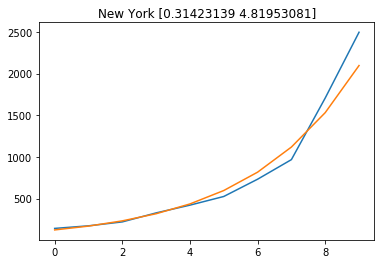

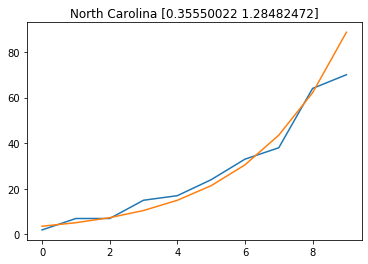

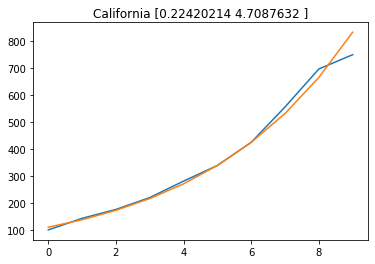

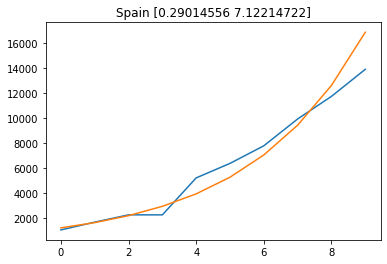

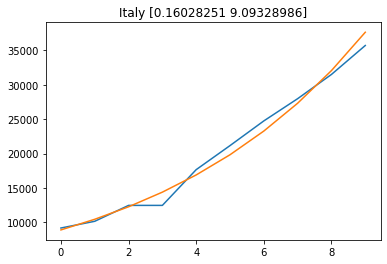

In [45]:

fit_model(confirmed_st, 'New York', 10)
plt.show()
fit_model(confirmed_st, 'North Carolina', 10)
plt.show()
fit_model(confirmed_st, 'California', 10)
plt.show()
fit_model(confirmed_st, 'Spain', 10)
plt.show()
fit_model(confirmed_st, 'Italy', 10)
plt.show()